In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler
import seaborn as sbn
from sklearn.impute import KNNImputer

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
SOURCE = Path('/mnt/data extra/DATASET/PREDICTION_DATA')
DATA_22 = SOURCE.joinpath('unidad de medida 2022').with_suffix('.csv')
DATA_23 = SOURCE.joinpath('unidad de medida 2023').with_suffix('.csv')

In [3]:
data_complete_22 = pd.read_csv(str(DATA_22),header=[0])
data_complete_22.drop(0,axis=0,inplace=True)
data_complete_23 = pd.read_csv(str(DATA_23),header=[0])
data_complete_23.drop(0,axis=0,inplace=True)
data_complete = pd.concat([data_complete_22,data_complete_23])
data_complete.reset_index(drop=True,inplace=True)
display(data_complete.head())

/tmp/ipykernel_62896/1143381664.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_complete_22 = pd.read_csv(str(DATA_22),header=[0])


,Fecha Creación,Material,Material (Cod),Peso neto (TON),Solicitate,Solicitate (Cod),Unidad Medida Base,Unidad Medida Venta,Cant Pedido UMV,Valor Neto,Contador Ped
0,1/1/2022,Cemento Fuerte Ecoplanet 50 kg,10011308.000,10.000,HECTOR QUINTANILLA BALAGUERA,0004155696,TO,SAC,200.0,"3,844.5",1
1,1/2/2022,Cemento Fuerte Ecoplanet 50 kg,10011308.000,10.000,FERRETERIA EL FERROL/ CHIQUINQUIRA,0004158888,TO,SAC,200.0,"3,939.1",1
2,1/3/2022,CEMENTO ESPECIAL PLUS (ESP+),10059053.000,34.190,PLANTA SUR CREDITO,0004151082,TO,TO,34.2,"11,863.9",1
3,1/3/2022,CEMENTO ESPECIAL PLUS (ESP+),10059053.000,33.330,PLANTA MILENIO,0004139983,TO,TO,33.3,"11,346.9",1
4,1/3/2022,CEMENTO ESPECIAL PLUS (ESP+),10059053.000,33.610,PLANTA NEREIDAS CREDITO,0004150188,TO,TO,33.6,"11,662.7",1


Seleccion de columnas

In [4]:
SELECT_COLUMNS = ['Fecha Creación','Material (Cod)','Peso neto (TON)','Solicitate (Cod)','Cant Pedido UMV','Valor Neto']
data_complete = data_complete[SELECT_COLUMNS]
display(data_complete.head())

,Fecha Creación,Material (Cod),Peso neto (TON),Solicitate (Cod),Cant Pedido UMV,Valor Neto
0,1/1/2022,10011308.000,10.000,0004155696,200.0,"3,844.5"
1,1/2/2022,10011308.000,10.000,0004158888,200.0,"3,939.1"
2,1/3/2022,10059053.000,34.190,0004151082,34.2,"11,863.9"
3,1/3/2022,10059053.000,33.330,0004139983,33.3,"11,346.9"
4,1/3/2022,10059053.000,33.610,0004150188,33.6,"11,662.7"


Conversion de tipos de datos

In [5]:
data_complete.dtypes

Fecha Creación       object
Material (Cod)      float64
Peso neto (TON)     float64
Solicitate (Cod)     object
Cant Pedido UMV      object
Valor Neto           object
dtype: object

In [7]:
data_complete

,Fecha Creación,Material (Cod),Peso neto (TON),Solicitate (Cod),Cant Pedido UMV,Valor Neto
0,1/1/2022,10011308.000,10.000,0004155696,200.0,"3,844.5"
1,1/2/2022,10011308.000,10.000,0004158888,200.0,"3,939.1"
2,1/3/2022,10059053.000,34.190,0004151082,34.2,"11,863.9"
3,1/3/2022,10059053.000,33.330,0004139983,33.3,"11,346.9"
4,1/3/2022,10059053.000,33.610,0004150188,33.6,"11,662.7"
...,...,...,...,...,...,...
105666,3/27/2023,10011308.000,34.500,4125819.000,690.0,"14,974.4"
105667,3/27/2023,10011308.000,35.500,4125819.000,710.0,"15,408.4"
105668,3/27/2023,10011309.000,34.000,4171362.000,"3,200.0","45,146.9"
105669,3/27/2023,10011309.000,35.020,4171362.000,"2,472.0","34,876.0"


In [8]:
def approx_to_nearest_multiple_of_5(num):
    return round(num / 5)*5

In [9]:
data_complete['Peso neto (TON)'] = data_complete['Peso neto (TON)'].fillna(-1)
format = '%m/%d/%Y'
data_complete['Fecha Creación']=pd.to_datetime(data_complete['Fecha Creación'], format=format)
# data_complete['Material (Cod)'] = data_complete['Material (Cod)'].apply(lambda x: np.int32(x))
data_complete['Peso neto (TON)'] = data_complete['Peso neto (TON)'].apply(lambda x: int(x))
# data_complete['Solicitate (Cod)'] = data_complete['Solicitate (Cod)'].apply(lambda x: str(x))                                                          
data_complete['Cant Pedido UMV'] = data_complete['Cant Pedido UMV'].apply(lambda x: int(float(x.replace(',',''))))
data_complete['Valor Neto'] = data_complete['Valor Neto'].apply(lambda x: int(float(x.replace(',',''))))
display(data_complete.dtypes)

data_complete = data_complete.applymap(lambda X: approx_to_nearest_multiple_of_5(X) if isinstance(X, int)  else X )
data_complete['Material (Cod)'] = data_complete['Material (Cod)'].apply(lambda x: int(x))
display(data_complete)
display(data_complete.dtypes)

Fecha Creación      datetime64[ns]
Material (Cod)             float64
Peso neto (TON)              int64
Solicitate (Cod)            object
Cant Pedido UMV              int64
Valor Neto                   int64
dtype: object

,Fecha Creación,Material (Cod),Peso neto (TON),Solicitate (Cod),Cant Pedido UMV,Valor Neto
0,2022-01-01,10011308,10,0004155696,200,3845
1,2022-01-02,10011308,10,0004158888,200,3940
2,2022-01-03,10059053,35,0004151082,35,11865
3,2022-01-03,10059053,35,0004139983,35,11345
4,2022-01-03,10059053,35,0004150188,35,11660
...,...,...,...,...,...,...
105666,2023-03-27,10011308,35,4125819.000,690,14975
105667,2023-03-27,10011308,35,4125819.000,710,15410
105668,2023-03-27,10011309,35,4171362.000,3200,45145
105669,2023-03-27,10011309,35,4171362.000,2470,34875


Fecha Creación      datetime64[ns]
Material (Cod)               int64
Peso neto (TON)              int64
Solicitate (Cod)            object
Cant Pedido UMV              int64
Valor Neto                   int64
dtype: object

Cambio de nombre

In [10]:
old = data_complete.columns
new = ['FECHA','MATERIAL','PESO','COMPRADOR','CANTIDAD','VALOR']
data_complete.rename(columns={old_:new_ for old_,new_ in zip(old,new)},inplace=True)
display(data_complete.head())

,FECHA,MATERIAL,PESO,COMPRADOR,CANTIDAD,VALOR
0,2022-01-01,10011308,10,0004155696,200,3845
1,2022-01-02,10011308,10,0004158888,200,3940
2,2022-01-03,10059053,35,0004151082,35,11865
3,2022-01-03,10059053,35,0004139983,35,11345
4,2022-01-03,10059053,35,0004150188,35,11660


Correcion de la columan de datos de compra para el uso de para cuantificar bien el ID del Comprador por dia

In [11]:
fix_buyer = []
for index,buyer in enumerate(data_complete.COMPRADOR):
    try:
        fix_buyer.append(str(int(buyer)))
    except:
        
        try:
            fix_buyer.append(str(int(float(buyer))))

        except:
            fix_buyer.append(str(buyer))
        
        
data_complete.COMPRADOR = fix_buyer
display("Lista de compradores")
display(pd.DataFrame(data_complete.COMPRADOR.value_counts()))

'Lista de compradores'

,COMPRADOR
4102523,3822
4177452,1452
4169882,1431
4177659,1275
4103801,1156
...,...
4180340,1
4181290,1
4183823,1
4181287,1


In [12]:
cantidad_materiales = pd.DataFrame(data_complete.MATERIAL.value_counts())
display(cantidad_materiales)

,MATERIAL
10011308,38588
10070707,14130
10059053,6515
10011306,5935
10011305,2315
...,...
96044601,1
96018785,1
96018801,1
96018813,1


Separacion de los datos en otras distancia de series de tiempo

In [11]:
#Cambio de indice
data_complete['Dia'] = data_complete.FECHA.dt.day
data_complete['Mes'] = data_complete.FECHA.dt.month
data_complete['Año'] = data_complete.FECHA.dt.year
data_complete['Semana'] = data_complete.FECHA.dt.isocalendar().week 
data_complete['DiaSemana'] = data_complete.FECHA.dt.day_of_week
display(data_complete)

,FECHA,MATERIAL,PESO,CANTIDAD,VALOR,Dia,Mes,Año,Semana,DiaSemana
0,2022-01-01,10011308,10,200,3845,1,1,2022,52,5
1,2022-01-02,10011308,10,200,3940,2,1,2022,52,6
2,2022-01-03,10059053,35,35,11865,3,1,2022,1,0
3,2022-01-03,10059053,35,35,11345,3,1,2022,1,0
4,2022-01-03,10059053,35,35,11660,3,1,2022,1,0
...,...,...,...,...,...,...,...,...,...,...
105666,2023-03-27,10011308,35,690,14975,27,3,2023,13,0
105667,2023-03-27,10011308,35,710,15410,27,3,2023,13,0
105668,2023-03-27,10011309,35,3200,45145,27,3,2023,13,0
105669,2023-03-27,10011309,35,2470,34875,27,3,2023,13,0


REMOCION DE OUTLINERS

In [12]:
#Cambio de indice
PRODUCTO = 10011308
# data_complete.set_index('FECHA',inplace=True)
df = data_complete[data_complete.MATERIAL == PRODUCTO]
df.set_index('FECHA',inplace=True)

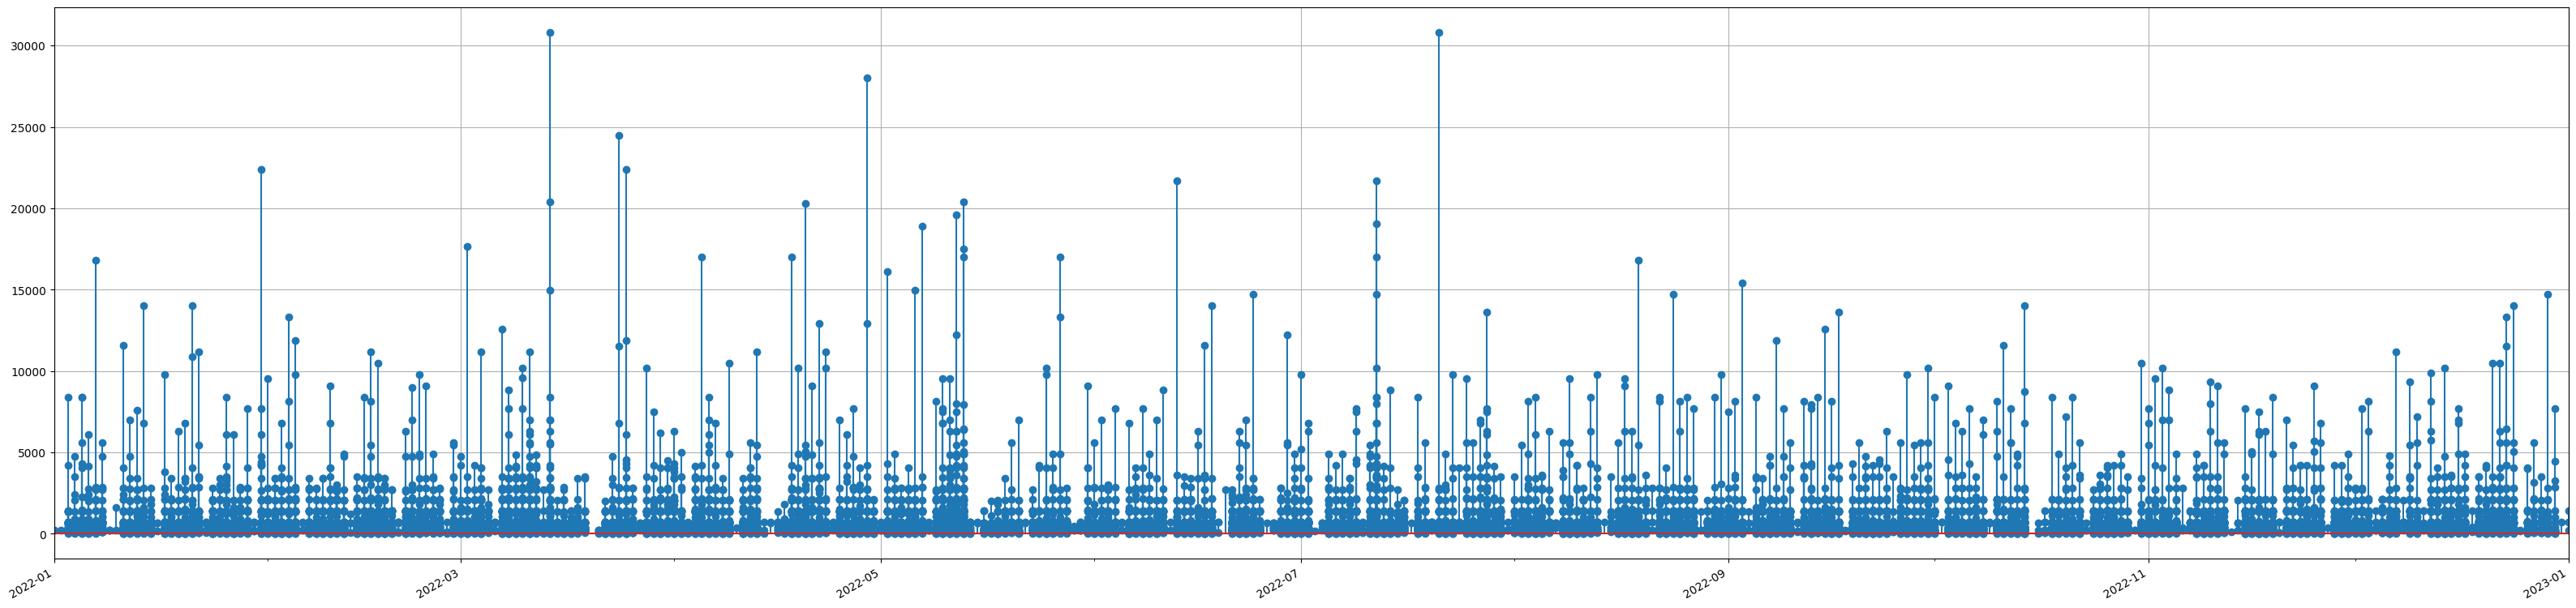

In [13]:
fig, ax = plt.subplots(figsize=(40,10))
ax.stem(df.index,df['CANTIDAD'].values)
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
datemin =np.datetime64(df.index.min(), 'Y')
datemax =np.datetime64(df.index.max(), 'Y')
ax.set_xlim(datemin, datemax)
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.grid(True)
fig.autofmt_xdate()
plt.show()

In [14]:
#Seleccion de columnas
df = df[['CANTIDAD']]

In [15]:
for x in ['CANTIDAD']:
    q75,q25 = np.percentile(df.loc[:,x],[95,1])
    intr_qr = q75-q25
 
    max = q75+(6*intr_qr)
    min = q25-(1.5*intr_qr)
    
    print(max,min)
    
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

display(df.isnull().sum())

14310.0 -3030.0


CANTIDAD    33
dtype: int64

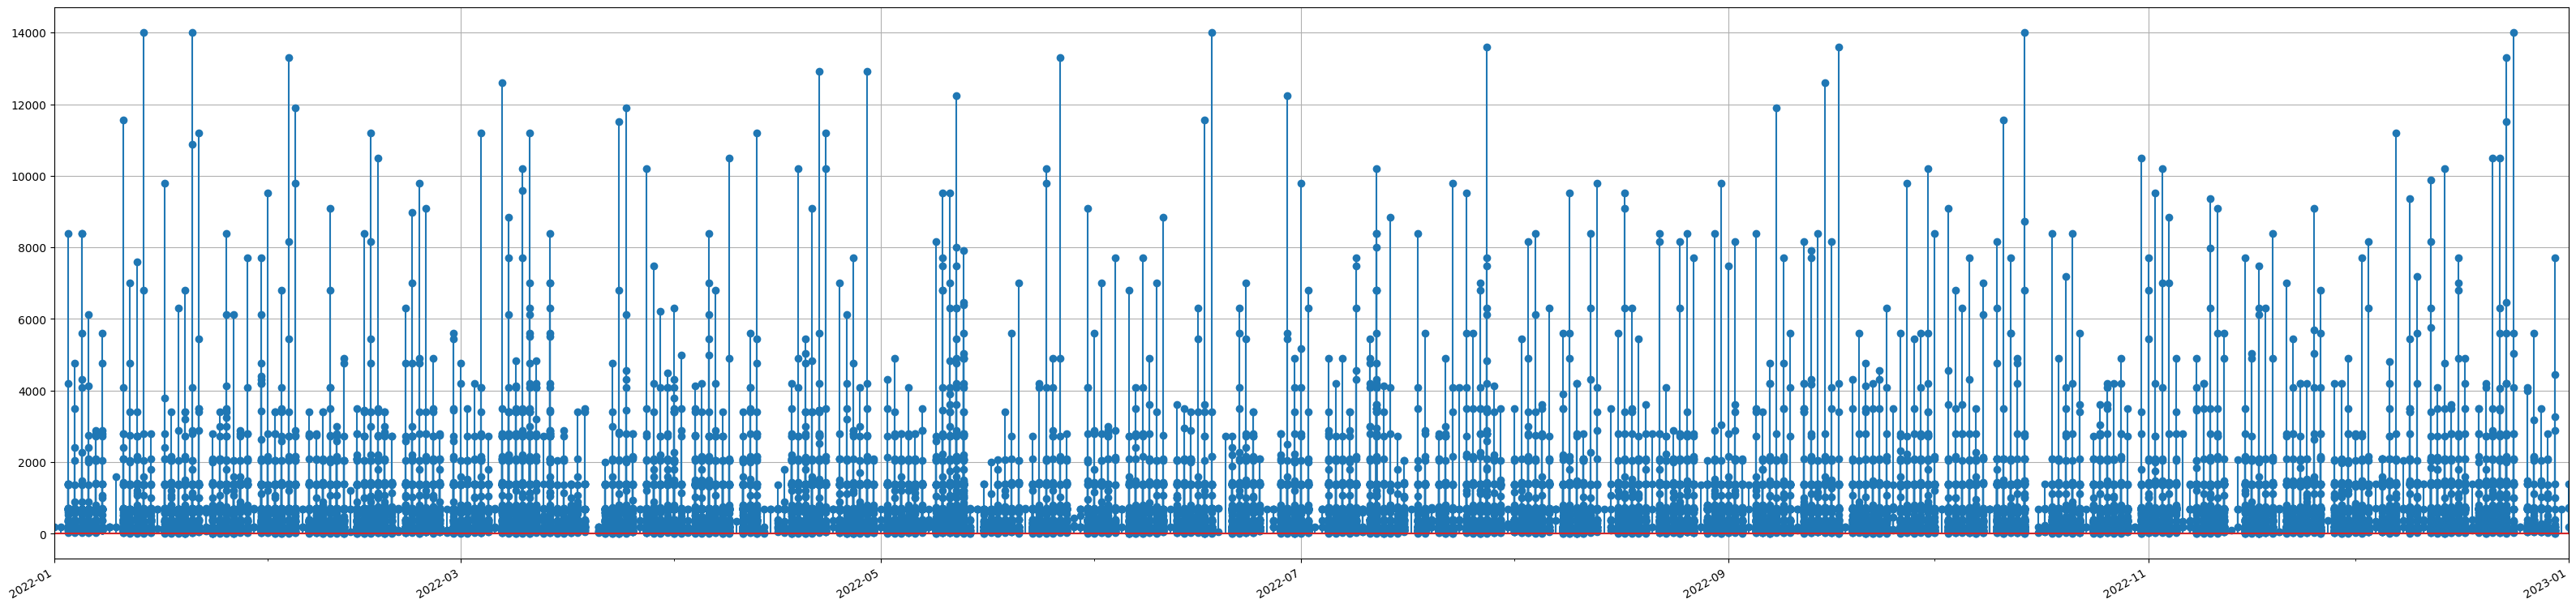

In [16]:
fig, ax = plt.subplots(figsize=(40,10))
ax.stem(df.index,df['CANTIDAD'].values)
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
datemin =np.datetime64(df.index.min(), 'Y')
datemax =np.datetime64(df.index.max(), 'Y')
ax.set_xlim(datemin, datemax)
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.grid(True)
fig.autofmt_xdate()
plt.show()

IMPUTACION DE DATOS

In [17]:
imputer = KNNImputer(n_neighbors=15, weights='uniform', metric= 'nan_euclidean')
imputer.fit(df.values)
xtrans = imputer.transform(df.values)
remove_outliners = pd.DataFrame({'CANTIDAD':xtrans.squeeze()})

In [18]:
df.loc[:,'CANTIDAD'] = remove_outliners['CANTIDAD'].values

In [19]:
df = df.astype(int)

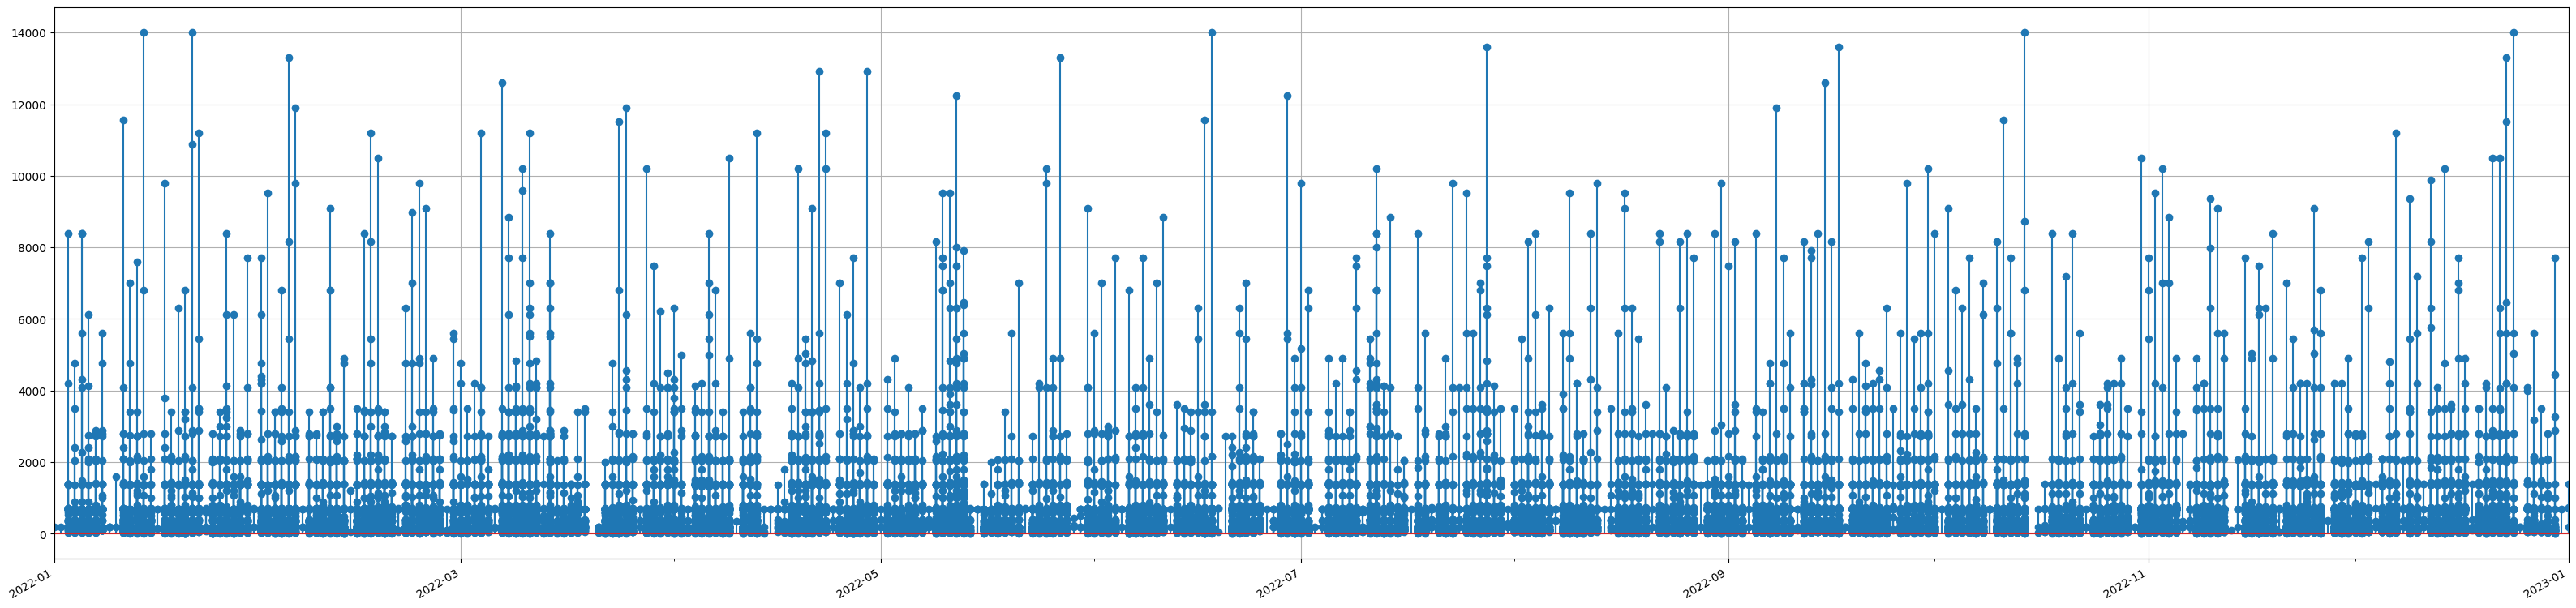

In [20]:
fig, ax = plt.subplots(figsize=(40,10))
ax.stem(df.index,df['CANTIDAD'].values)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin =np.datetime64(df.index.min(), 'Y')
datemax =np.datetime64(df.index.max(), 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
# ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

# Seleccion de producto y generacion de fecha

In [21]:
#Cambio de indice
PRODUCTO = 10070707
# data_complete.set_index('FECHA',inplace=True)
# df = data_complete[data_complete.MATERIAL == PRODUCTO]
# display(df.head())

df = df.groupby(df.index).sum()
index = pd.date_range(df.index[0],df.index.max())
fill_index = pd.DataFrame([ x for x in range(len(index)) ],index=index)
df = df.reindex(fill_index.index, method='bfill')

df['DIA'] = df.index.day
df['MES'] = df.index.month
# df['ANO'] = df.index.year
df['SEMANA'] = df.index.isocalendar().week 
df['DIASEMANA'] = df.index.day_of_week
display(df.head())

,CANTIDAD,DIA,MES,SEMANA,DIASEMANA
2022-01-01,200,1,1,52,5
2022-01-02,200,2,1,52,6
2022-01-03,36410,3,1,1,0
2022-01-04,36250,4,1,1,1
2022-01-05,62190,5,1,1,2


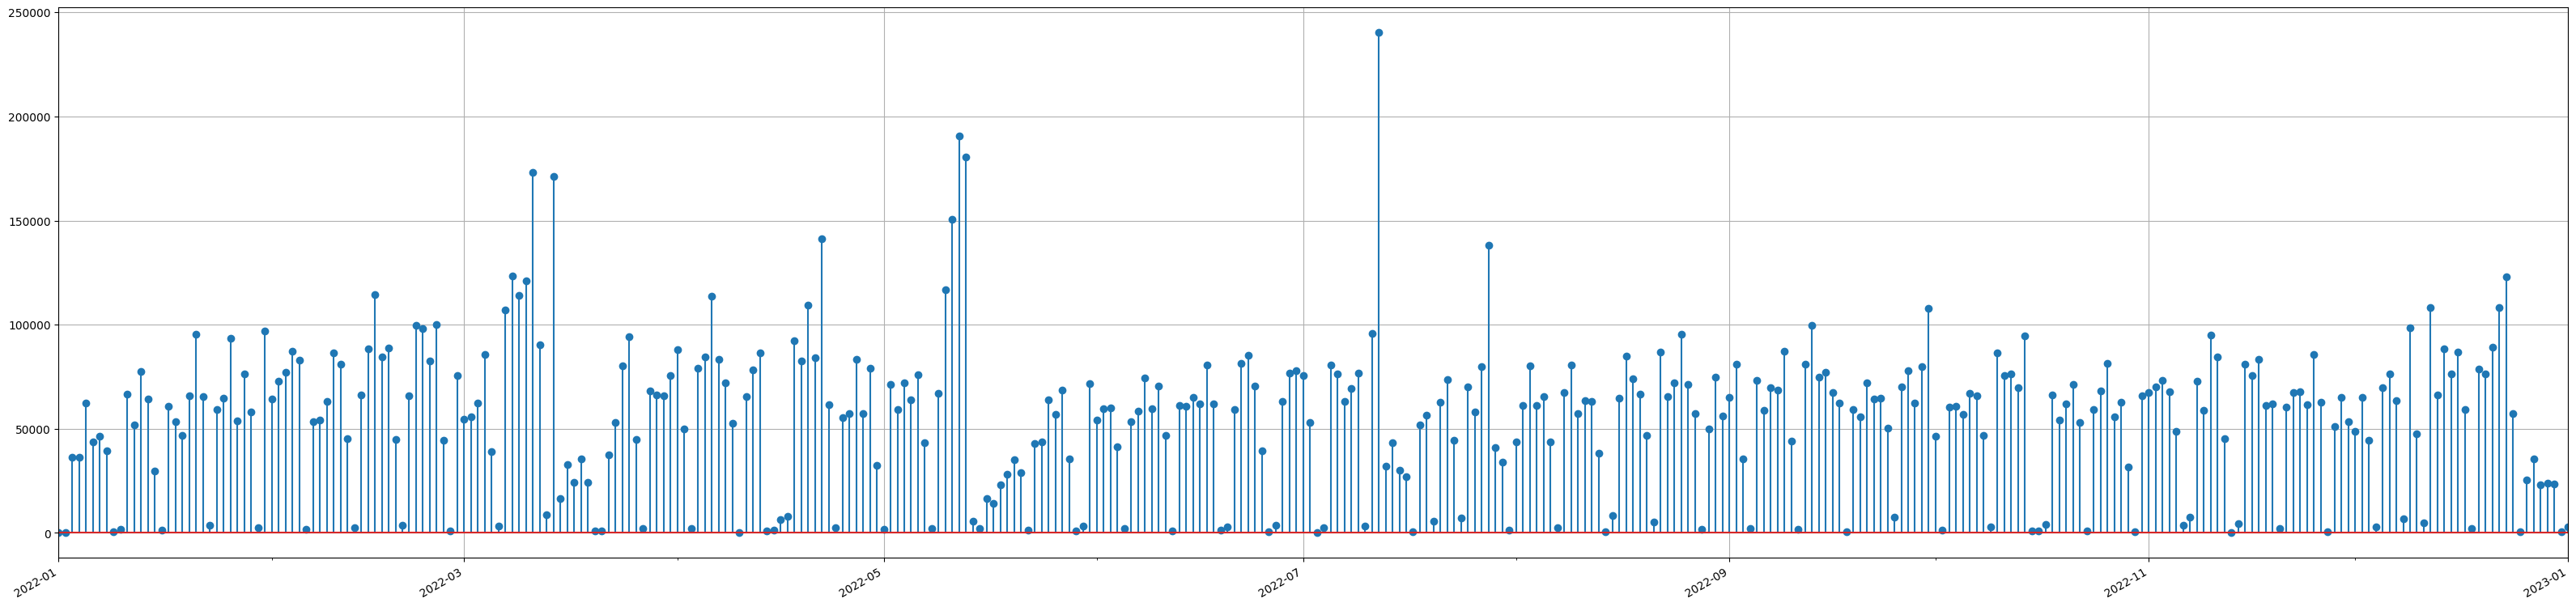

In [22]:
fig, ax = plt.subplots(figsize=(40,10))
ax.stem(df.index,df['CANTIDAD'].values)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin =np.datetime64(df.index.min(), 'Y')
datemax =np.datetime64(df.index.max(), 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
# ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

Remover outliners

142551.25 -34598.75


/tmp/ipykernel_58638/3885138175.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w.loc[df_w[x] > data_max,x] = np.nan


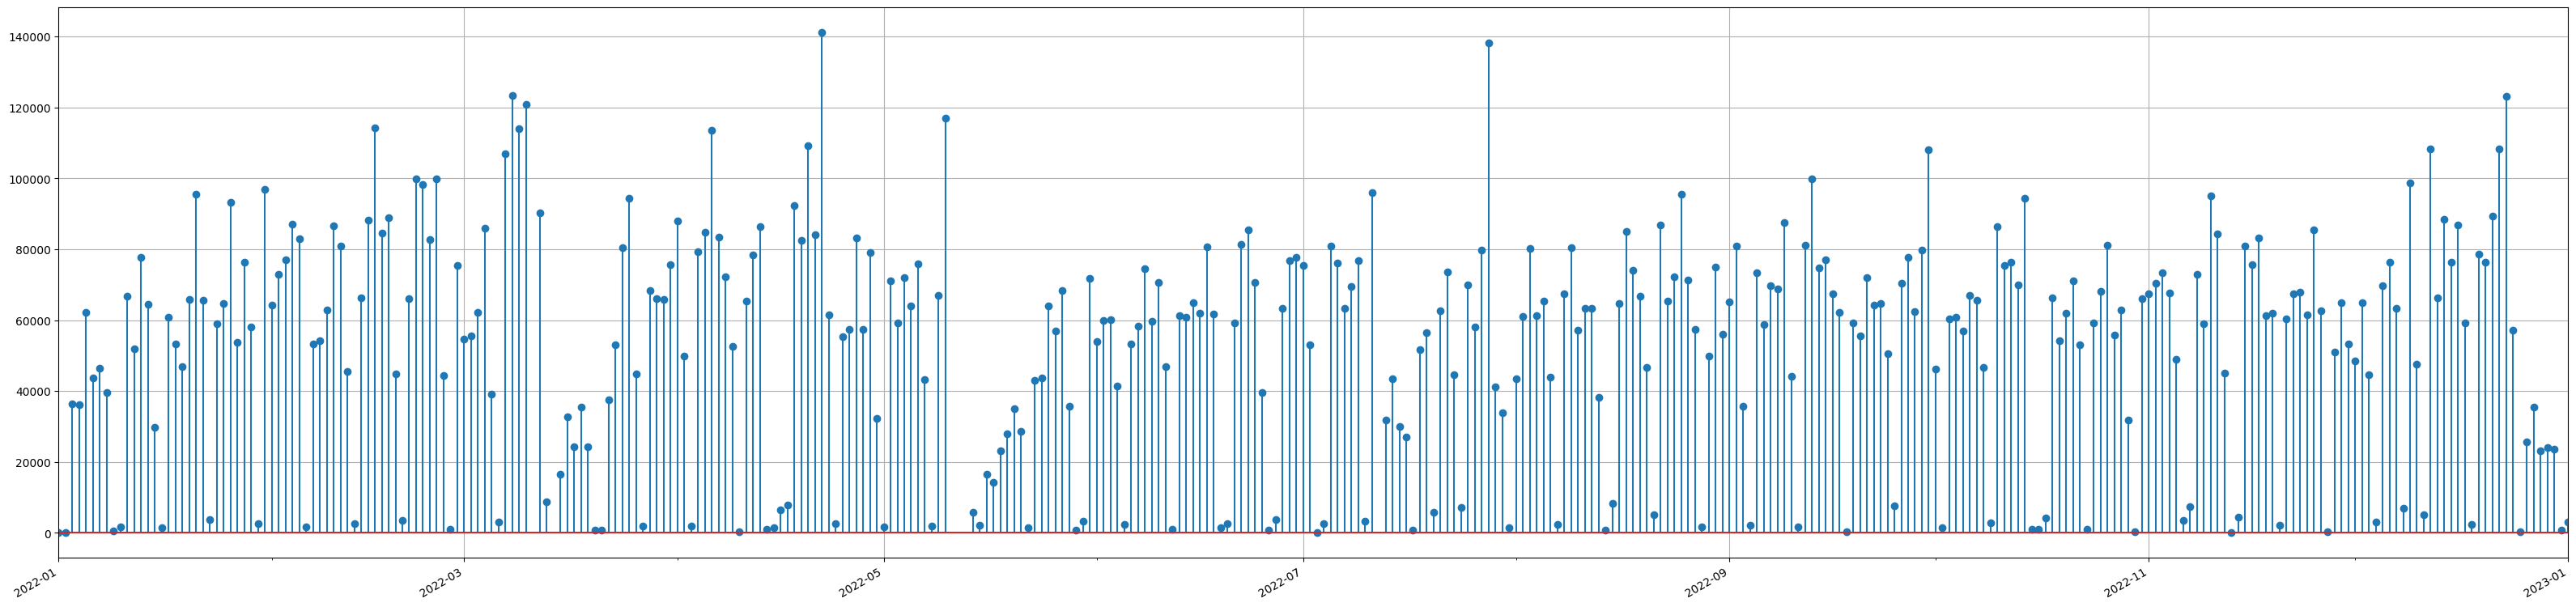

In [23]:
# Seleccion de columnas
df_w = df[['CANTIDAD']]

data_max =0
data_min = 0
for x in ['CANTIDAD']:
    q75,q25 = np.percentile(df_w.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    data_max = q75+(1.5*intr_qr)
    data_min = q25-(1.5*intr_qr)
    
    print(data_max, data_min)
    
    df_w.loc[df_w[x] < data_min,x] = np.nan
    df_w.loc[df_w[x] > data_max,x] = np.nan

df_w.isnull().sum()


fig, ax = plt.subplots(figsize=(40,10))
ax.stem(df_w.index,df_w['CANTIDAD'].values)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin =np.datetime64(df.index.min(), 'Y')
datemax =np.datetime64(df.index.max(), 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
# ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

In [25]:
from scipy import stats

In [26]:
print('Media de los datos',df_w.CANTIDAD.mean())
print('Varianza de los datos',df_w.CANTIDAD.var())
print('Desviacion estandar',df_w.CANTIDAD.std())

Media de los datos 52754.63370786517
Varianza de los datos 1001384455.624537
Desviacion estandar 31644.659195898083


In [27]:
data_per_weeks = df_w.groupby([pd.Grouper(freq='W')])['CANTIDAD'].sum()
data_per_weeks = pd.DataFrame(data_per_weeks)

In [28]:
data_per_weeks.loc[:,'CANTIDAD_log'] = np.log(data_per_weeks['CANTIDAD'])

In [29]:
print('Media de los datos',data_per_weeks.CANTIDAD_log.mean())
print('Varianza de los datos',data_per_weeks.CANTIDAD_log.var())
print('Desviacion estandar',data_per_weeks.CANTIDAD_log.std())

Media de los datos 12.59701078217063
Varianza de los datos 1.0425143772722463
Desviacion estandar 1.0210359333893426


In [30]:
data_per_weeks

,CANTIDAD,CANTIDAD_log
2022-01-02,400.000,5.991
2022-01-09,265136.000,12.488
2022-01-16,293820.000,12.591
2022-01-23,391555.000,12.878
2022-01-30,407860.000,12.919
...,...,...
2023-03-05,363831.000,12.804
2023-03-12,353460.000,12.776
2023-03-19,414135.000,12.934
2023-03-26,396220.000,12.890


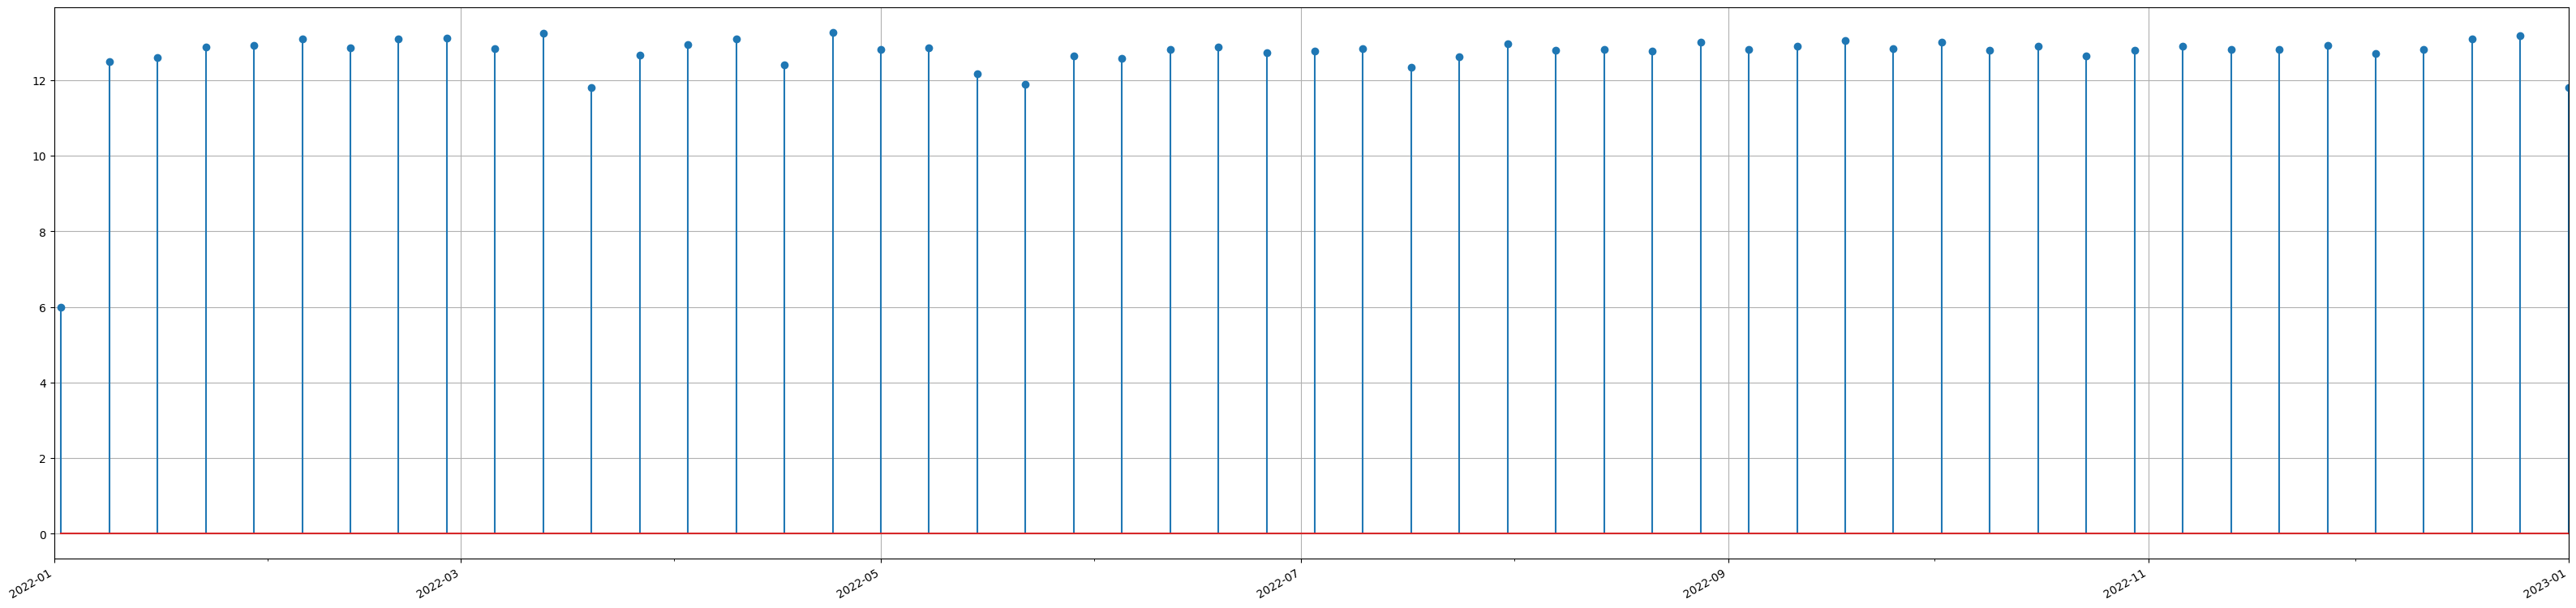

In [31]:
fig, ax = plt.subplots(figsize=(40,10))
ax.stem(data_per_weeks.index,data_per_weeks['CANTIDAD_log'].values)
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
datemin =np.datetime64(df.index.min(), 'Y')
datemax =np.datetime64(df.index.max(), 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.grid(True)

fig.autofmt_xdate()
plt.show()

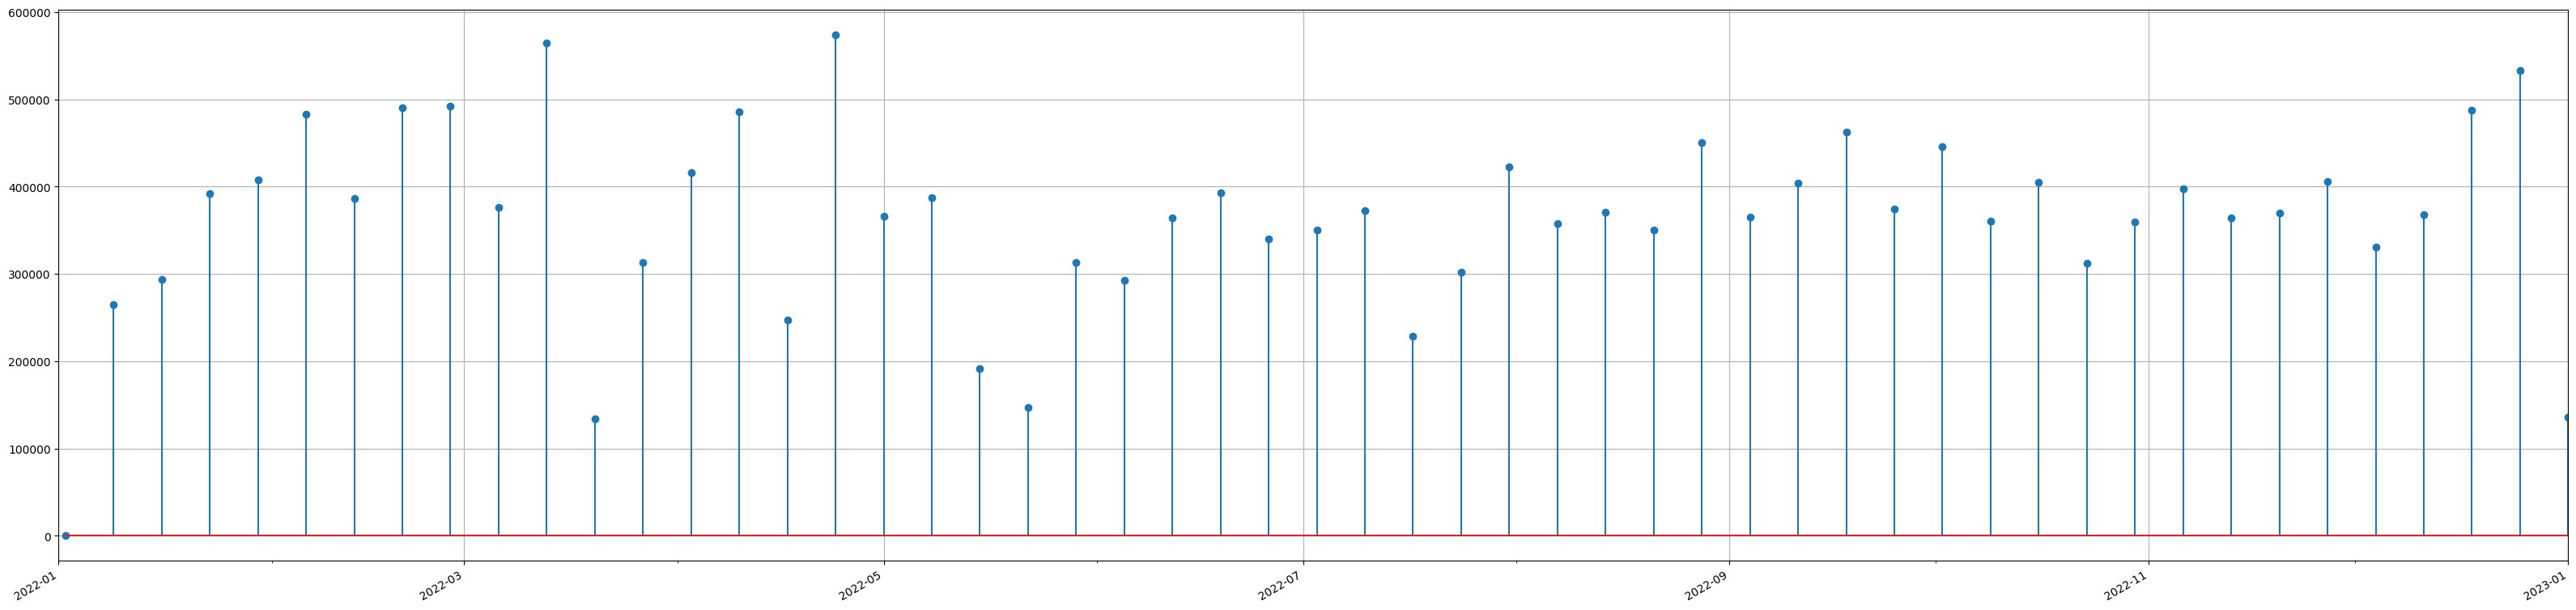

In [32]:
fig, ax = plt.subplots(figsize=(40,10))
ax.stem(data_per_weeks.index,data_per_weeks['CANTIDAD'].values)
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
datemin =np.datetime64(df.index.min(), 'Y')
datemax =np.datetime64(df.index.max(), 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.grid(True)

fig.autofmt_xdate()
plt.show()

In [33]:
# data_per_weeks = df_w.groupby([pd.Grouper(freq='W')])['CANTIDAD'].sum()
# data_per_weeks = pd.DataFrame(data_per_weeks)

In [38]:
window_size = 1# Número de pasos de tiempo anteriores a considerar

# Crear columnas desplazadas
for i in range(1, window_size + 1):
    data_per_weeks[f'Cantidad_lag_{i}'] = data_per_weeks['CANTIDAD_log'].shift(i)

# Eliminar las filas con valores NaN creados por el desplazamiento
data_per_weeks = data_per_weeks.dropna()

/tmp/ipykernel_57881/1106813089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_weeks[f'Cantidad_lag_{i}'] = data_per_weeks['CANTIDAD_log'].shift(i)


In [39]:
data_per_weeks['MES'] = data_per_weeks.index.month
data_per_weeks['SEMANA'] = data_per_weeks.index.isocalendar().week 

/tmp/ipykernel_57881/2134833693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_weeks['MES'] = data_per_weeks.index.month
/tmp/ipykernel_57881/2134833693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_weeks['SEMANA'] = data_per_weeks.index.isocalendar().week


In [40]:
data_per_weeks

,CANTIDAD,CANTIDAD_log,Cantidad_lag_1,MES,SEMANA
2022-01-16,293820.000,12.591,12.488,1,2
2022-01-23,391555.000,12.878,12.591,1,3
2022-01-30,407860.000,12.919,12.878,1,4
2022-02-06,482931.000,13.088,12.919,2,5
2022-02-13,386135.000,12.864,13.088,2,6
...,...,...,...,...,...
2023-03-05,363831.000,12.804,12.948,3,9
2023-03-12,353460.000,12.776,12.804,3,10
2023-03-19,414135.000,12.934,12.776,3,11
2023-03-26,396220.000,12.890,12.934,3,12


In [42]:
train_fraction = 0.9
train_size = int(len(data_per_weeks) * train_fraction)

train_df = data_per_weeks.iloc[:train_size]
test_df = data_per_weeks.iloc[train_size:]
display(train_df.head())

X_train = train_df.drop(['CANTIDAD_log','CANTIDAD'], axis=1)
y_train = train_df['CANTIDAD_log']

X_test = test_df.drop(['CANTIDAD_log','CANTIDAD'], axis=1)
y_test = test_df['CANTIDAD_log']

### MODELO NNGP

In [44]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
from tensorflow_probability import layers as tfpl
from tensorflow_probability import math as tfpm

2023-05-11 04:18:48.674025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 04:18:48.768128: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [45]:
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y= StandardScaler()
Y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))


In [46]:
def create_sliding_window_data(X, y, window_size):
    X_windowed = []
    y_windowed = []
    
    for i in range(len(X) - window_size):
        X_windowed.append(X[i:i + window_size])
        y_windowed.append(y[i + window_size])
        
    return np.array(X_windowed), np.array(y_windowed)


In [47]:
window_size = 4

X_train_windowed, y_train_windowed = create_sliding_window_data(X_train_scaled, Y_train_scaled, window_size)
X_test_windowed, y_test_windowed = create_sliding_window_data(X_test_scaled, y_test_scaled, window_size)


In [48]:
n_layers = 2
n_neurons = 50
activation_fn = tf.nn.relu
# kernel_fn = tfpm.nn.relu_kernel

nngp_model = tf.keras.Sequential()

for _ in range(n_layers):
    nngp_model.add(tf.keras.layers.TimeDistributed(tfpl.DenseReparameterization(
        input_shape=(window_size, 5),
        units=n_neurons,
        activation=None,
        kernel_prior_fn=tfpl.default_multivariate_normal_fn,
        kernel_posterior_fn=tfpl.default_mean_field_normal_fn())))

    nngp_model.add(tf.keras.layers.TimeDistributed(tfpl.DistributionLambda(
        lambda t: tfd.Normal(loc=t, scale=1.0))))

# Añade una capa LSTM o GRU si deseas incluir la estructura temporal
nngp_model.add(tf.keras.layers.LSTM(32))

nngp_model.add(tf.keras.layers.Dense(1))


2023-05-11 04:18:51.267101: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-11 04:18:51.282139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-11 04:18:51.282484: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [49]:
# Compila y entrena el modelo
# nngp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss=lambda y, rv_y: -rv_y.log_prob(y))
nngp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError())
nngp_model.fit(X_train_windowed, y_train_windowed, epochs=800, verbose=1)

Epoch 1/800


/home/bdebian/.virtualenvs/predeman/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/home/bdebian/.virtualenvs/predeman/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(
2023-05-11 04:18:54.431870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-11 04:18:55.201424: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8900
2023-05-11 04:18:55.283399: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fe090015400 initialized for p

2/2 [==============================] - 3s 7ms/step - loss: 6823.1924
Epoch 2/800
2/2 [==============================] - 0s 5ms/step - loss: 6767.0874
Epoch 3/800
2/2 [==============================] - 0s 3ms/step - loss: 6711.8774
Epoch 4/800
2/2 [==============================] - 0s 4ms/step - loss: 6657.7339
Epoch 5/800
2/2 [==============================] - 0s 3ms/step - loss: 6603.9575
Epoch 6/800
2/2 [==============================] - 0s 3ms/step - loss: 6550.4541
Epoch 7/800
2/2 [==============================] - 0s 4ms/step - loss: 6497.3892
Epoch 8/800
2/2 [==============================] - 0s 3ms/step - loss: 6444.6440
Epoch 9/800
2/2 [==============================] - 0s 3ms/step - loss: 6391.8809
Epoch 10/800
2/2 [==============================] - 0s 4ms/step - loss: 6339.4487
Epoch 11/800
2/2 [==============================] - 0s 3ms/step - loss: 6287.1221
Epoch 12/800
2/2 [==============================] - 0s 5ms/step - loss: 6234.8667
Epoch 13/800
2/2 [===================

In [50]:
#Predicciones  modelos
y_test_pred_dist = nngp_model(X_train_windowed)
# , y_train_windowed
for data_test,prediction_data,original in zip(X_train_windowed,y_test_pred_dist,y_train_windowed):
    inverse_y_pred = scaler_y.inverse_transform(prediction_data.numpy().reshape(-1, 1))
    inverse_y_test = scaler_y.inverse_transform(original.reshape(-1, 1))
    prediccion_modelo = inverse_y_pred.squeeze()
    original = inverse_y_test.squeeze()
    
    # error = mse([original], [prediccion_modelo])
    
    
    X_test_mont = scaler_x.inverse_transform(data_test)
    display(pd.DataFrame(X_test_mont,columns=['MES','ANO','SEMANA']))
    display(pd.DataFrame({'Prediccion':[prediccion_modelo],'Orignal':[original]}))##,'Error':[error]}))

ValueError: Shape of passed values is (4, 4), indices imply (4, 3)

<AxesSubplot: >

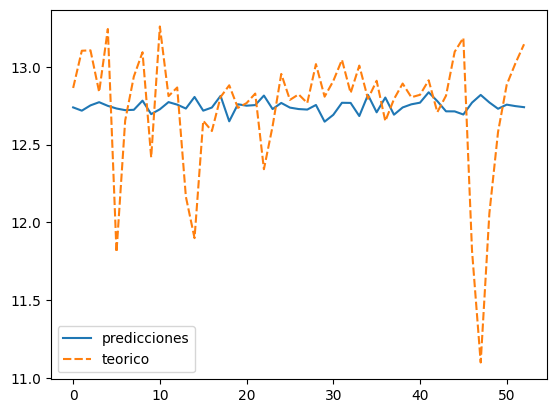

In [51]:
inverse_y_pred = scaler_y.inverse_transform(y_test_pred_dist.numpy())
inverse_y_test = scaler_y.inverse_transform(y_train_windowed)
date_y = pd.DataFrame({'predicciones':inverse_y_pred.reshape(-1),'teorico':inverse_y_test.reshape(-1)})
sbn.lineplot(data = date_y[['predicciones','teorico']])

## Modelo de transformes

In [24]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import T5ForConditionalGeneration

/home/bdebian/.virtualenvs/predeman/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
df_w

,CANTIDAD
2022-01-01,200.000
2022-01-02,200.000
2022-01-03,36410.000
2022-01-04,36250.000
2022-01-05,62190.000
...,...
2023-03-23,100250.000
2023-03-24,74580.000
2023-03-25,44130.000
2023-03-26,7280.000


In [26]:
df_w.loc[:,'CANTIDAD_log'] = np.log(df_w['CANTIDAD'])

window_size = 1# Número de pasos de tiempo anteriores a considerar

# Crear columnas desplazadas
for i in range(1, window_size + 1):
    df_w[f'Cantidad_lag_{i}'] = df_w['CANTIDAD_log'].shift(i)

# Eliminar las filas con valores NaN creados por el desplazamiento
df_w = df_w.dropna()

display(df_w)

/tmp/ipykernel_58638/1984376527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w.loc[:,'CANTIDAD_log'] = np.log(df_w['CANTIDAD'])
/tmp/ipykernel_58638/1984376527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w[f'Cantidad_lag_{i}'] = df_w['CANTIDAD_log'].shift(i)


,CANTIDAD,CANTIDAD_log,Cantidad_lag_1
2022-01-02,200.000,5.298,5.298
2022-01-03,36410.000,10.503,5.298
2022-01-04,36250.000,10.498,10.503
2022-01-05,62190.000,11.038,10.498
2022-01-06,43660.000,10.684,11.038
...,...,...,...
2023-03-23,100250.000,11.515,11.275
2023-03-24,74580.000,11.220,11.515
2023-03-25,44130.000,10.695,11.220
2023-03-26,7280.000,8.893,10.695


In [27]:
df_w['MES'] = df_w.index.month
# df_w['ANO'] = df_w.index.year
df_w['SEMANA'] = df_w.index.isocalendar().week 
df_w['DIASEMANA'] = df_w.index.day_of_week

/tmp/ipykernel_58638/1886508773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['MES'] = df_w.index.month
/tmp/ipykernel_58638/1886508773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['SEMANA'] = df_w.index.isocalendar().week
/tmp/ipykernel_58638/1886508773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [28]:
df_w

,CANTIDAD,CANTIDAD_log,Cantidad_lag_1,MES,SEMANA,DIASEMANA
2022-01-02,200.000,5.298,5.298,1,52,6
2022-01-03,36410.000,10.503,5.298,1,1,0
2022-01-04,36250.000,10.498,10.503,1,1,1
2022-01-05,62190.000,11.038,10.498,1,1,2
2022-01-06,43660.000,10.684,11.038,1,1,3
...,...,...,...,...,...,...
2023-03-23,100250.000,11.515,11.275,3,12,3
2023-03-24,74580.000,11.220,11.515,3,12,4
2023-03-25,44130.000,10.695,11.220,3,12,5
2023-03-26,7280.000,8.893,10.695,3,12,6


In [29]:
train_fraction = 0.9
train_size = int(len(df_w) * train_fraction)

train_df = df_w.iloc[:train_size]
test_df = df_w.iloc[train_size:]
display(train_df.head())

X_train = train_df.drop(['CANTIDAD_log','CANTIDAD'], axis=1)
y_train = train_df['CANTIDAD_log']

X_test = test_df.drop(['CANTIDAD_log','CANTIDAD'], axis=1)
y_test = test_df['CANTIDAD_log']

,CANTIDAD,CANTIDAD_log,Cantidad_lag_1,MES,SEMANA,DIASEMANA
2022-01-02,200.000,5.298,5.298,1,52,6
2022-01-03,36410.000,10.503,5.298,1,1,0
2022-01-04,36250.000,10.498,10.503,1,1,1
2022-01-05,62190.000,11.038,10.498,1,1,2
2022-01-06,43660.000,10.684,11.038,1,1,3


In [30]:
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y= StandardScaler()
Y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

# scaler_x = {}
# for col in [column for column in X_train.columns]:
#     scaler_x[col] = StandardScaler()
#     X_train[col] = scaler_x[col].fit_transform(X_train[col].to_numpy().reshape(-1, 1))

# scaler_y= StandardScaler()
# Y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))


In [31]:
def create_sliding_window_data(X, y, window_size):
    X_windowed = []
    y_windowed = []
    
    for i in range(len(X) - window_size):
        X_windowed.append(X[i:i + window_size])
        y_windowed.append(y[i + window_size])
        
    return np.array(X_windowed), np.array(y_windowed)

window_size = 7

# X_train_windowed, y_train_windowed = create_sliding_window_data(X_train.values, y_train.values.reshape(-1,1), window_size)
X_train_windowed, y_train_windowed = create_sliding_window_data(X_train_scaled, Y_train_scaled, window_size)
X_test_windowed, y_test_windowed = create_sliding_window_data(X_test_scaled, y_test_scaled, window_size)

In [46]:
# Crear un conjunto de datos personalizado para PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

dataset = TimeSeriesDataset(X_train_windowed, y_train_windowed)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

class CustomTransformer(nn.Module):
    def __init__(self, d_model, nhead, num_layers, dim_feedforward):
        super().__init__()
        self.transformer = nn.LSTM(d_model, hidden_size=15, num_layers=3, batch_first=True)
        self.linear = nn.Linear(d_model, 1)

    def forward(self, x):
        # Crear una máscara de atención triangular inferior para asegurar que las posiciones futuras no afecten las predicciones
        attn_mask = torch.triu(torch.ones(x.size(0), x.size(0)), diagonal=1).bool().to(x.device)
        
        # Proporcionar el mismo tensor para las entradas de origen y destino
        # x = self.transformer(x, x)
        x = self.linear(x[:, -1])
        return x

# Hiperparámetros del modelo
d_model = 4  # Cambiar esto para que coincida con la cantidad de características en tus datos
nhead = 2
num_layers = 2
dim_feedforward = 256

# Crear el modelo
model = CustomTransformer(d_model, nhead, num_layers, dim_feedforward)

# Define your execution device 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print("The model will be running on", device, "device\n") 
model.to(device)   

# Entrenar el modelo con tus datos (necesitarás ajustar esto a tu problema específico)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 190

for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        # Asegurar que los datos tienen la forma correcta (S, N, E)
        # batch_X = batch_X.transpose(0, 1)
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        # Hacer predicciones con los datos de entrada
        predictions = model(batch_X).squeeze(-1)
        
        # Calcular la pérdida
        loss = criterion(predictions, batch_y)
        
        # Optimizar el modelo
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # print(loss,epoch)
        # Validation
    # if epoch % 100 != 0:
    #     continue
    # model.eval()
    # with torch.no_grad():
    #     y_pred = model(X_train)
    #     train_rmse = np.sqrt(loss_fn(y_pred, y_train))
    #     y_pred = model(X_test)
    #     test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    # print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
print(loss,epoch)

The model will be running on cuda:0 device



/home/bdebian/.virtualenvs/predeman/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.3748, device='cuda:0', grad_fn=<MseLossBackward0>) 189


In [58]:
torch.save(model.state_dict(), f"{PRODUCTO}_working_rescale_data_transformer.pth")

In [60]:
# dataset = TimeSeriesDataset(X_test_windowed, y_test_windowed)
# dataloader_test = DataLoader(dataset, batch_size=1, shuffle=True)
prediccion = []
original= []
for batch_X, batch_y in dataloader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
#         inverse_input = batch_X.cpu().detach().numpy()
#         inverso_input_reshape = scaler_x.inverse_transform(inverse_input.reshape(-1,3))
        
#         frame_input_inverse  = pd.DataFrame(inverso_input_reshape,columns=['MES','ANO','SEMANA'])
#         display(frame_input_inverse)

        predictions = model(batch_X).squeeze(-1)
        
        predictions_cpu = predictions.cpu().detach().numpy()
        prediccion_inverse = scaler_y.inverse_transform(predictions_cpu.reshape(-1, 1))
        original_inverse = batch_y.cpu().detach().numpy()
        original_inverse = scaler_y.inverse_transform(original_inverse.reshape(-1, 1))
        
        prediccion.append(np.exp(prediccion_inverse.squeeze()))
        
        original.append(np.exp(original_inverse.squeeze()))
        # display('Prediccion:',np.exp(prediccion_inverse.squeeze()), 'Original:',np.exp(original_inverse.squeeze()))

resultado = pd.DataFrame({'Prediccion':prediccion,'Original':original})

# sbn.lineplot(data = resultado[['Prediccion','Original']])

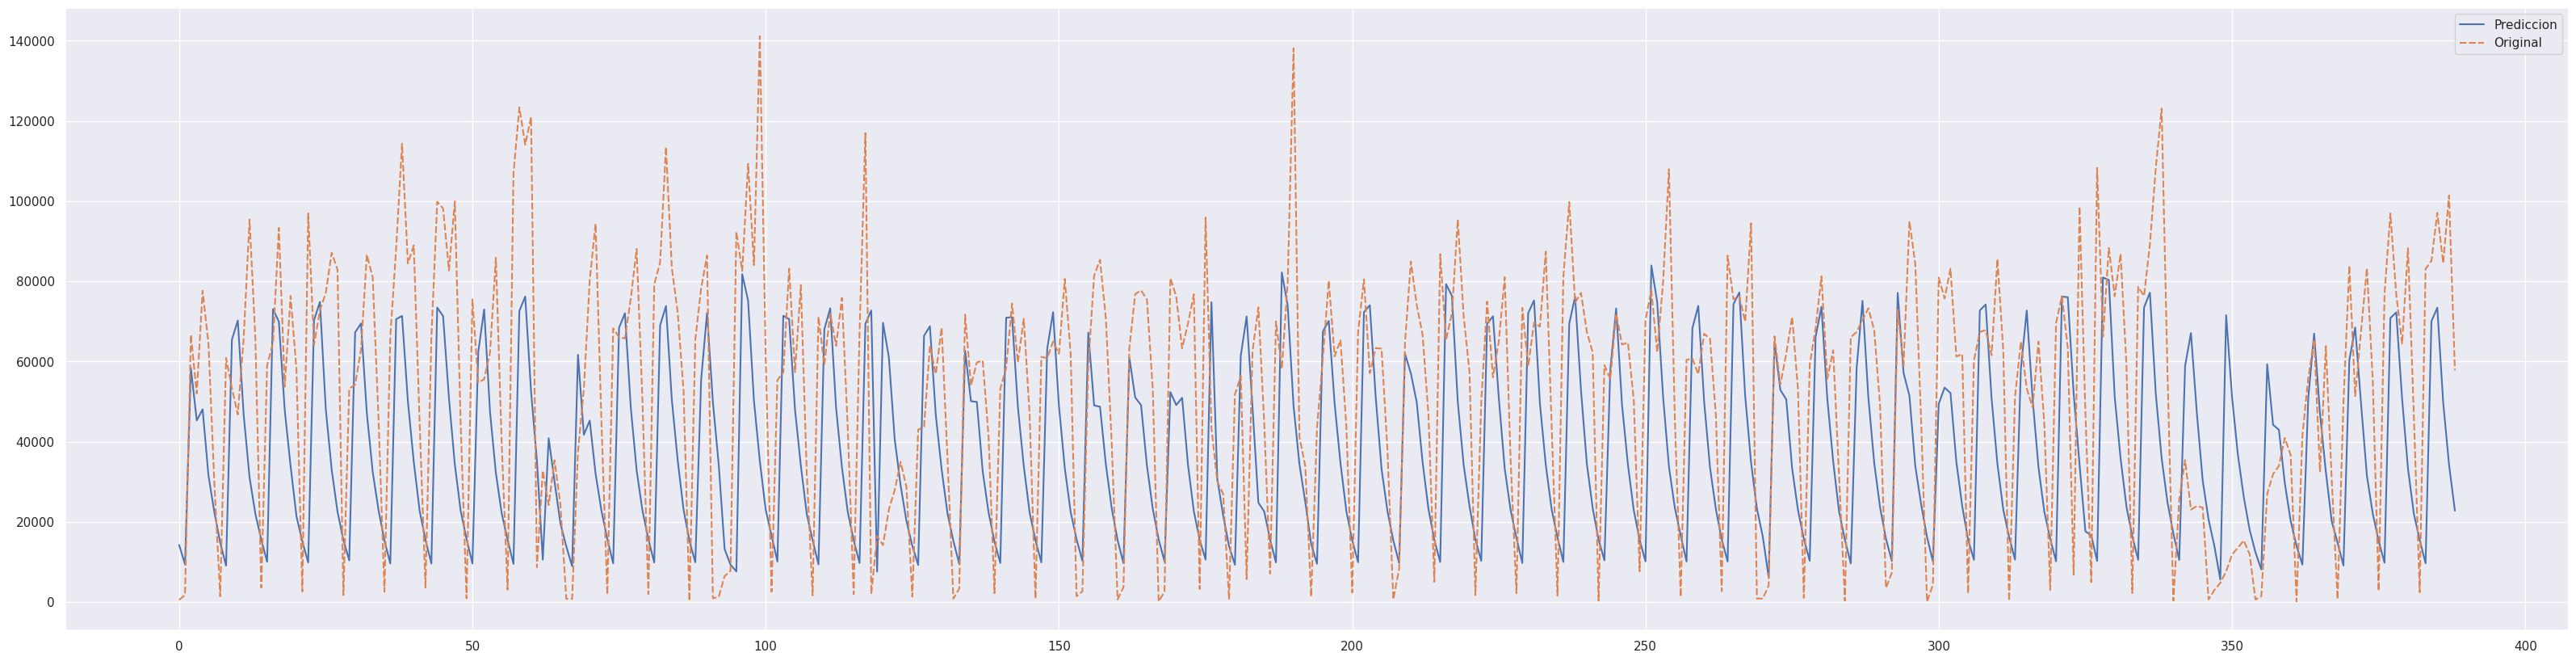

In [61]:
sbn.set(rc={'figure.figsize':(40, 10)})
sbn.set(font_scale = 1)
sbn.lineplot(data = resultado[['Prediccion','Original']])
plt.savefig('/home/bdebian/Documents/Projects/Stoke_prediccition/reports/Prediccion_entrenamiento.png')

In [64]:
X_test_windowed, y_test_windowed = create_sliding_window_data(X_test_scaled, y_test_scaled, window_size)

dataset = TimeSeriesDataset(X_test_windowed, y_test_windowed)
dataloader_test = DataLoader(dataset, batch_size=1, shuffle=True)

prediccion_test = []
original_test= []
for batch_X, batch_y in dataloader_test:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
#         inverse_input = batch_X.cpu().detach().numpy()
#         inverso_input_reshape = scaler_x.inverse_transform(inverse_input.reshape(-1,3))
        
#         frame_input_inverse  = pd.DataFrame(inverso_input_reshape,columns=['MES','ANO','SEMANA'])
#         display(frame_input_inverse)

        predictions = model(batch_X).squeeze(-1)
        
        predictions_cpu = predictions.cpu().detach().numpy()
        prediccion_inverse = scaler_y.inverse_transform(predictions_cpu.reshape(-1, 1))
        original_inverse = batch_y.cpu().detach().numpy()
        original_inverse = scaler_y.inverse_transform(original_inverse.reshape(-1, 1))
        
        prediccion_test.append(np.exp(prediccion_inverse.squeeze()))
        
        original_test.append(np.exp(original_inverse.squeeze()))
        # display('Prediccion:',np.exp(prediccion_inverse.squeeze()), 'Original:',np.exp(original_inverse.squeeze()))

resultado = pd.DataFrame({'Prediccion':prediccion_test,'Original':original_test})


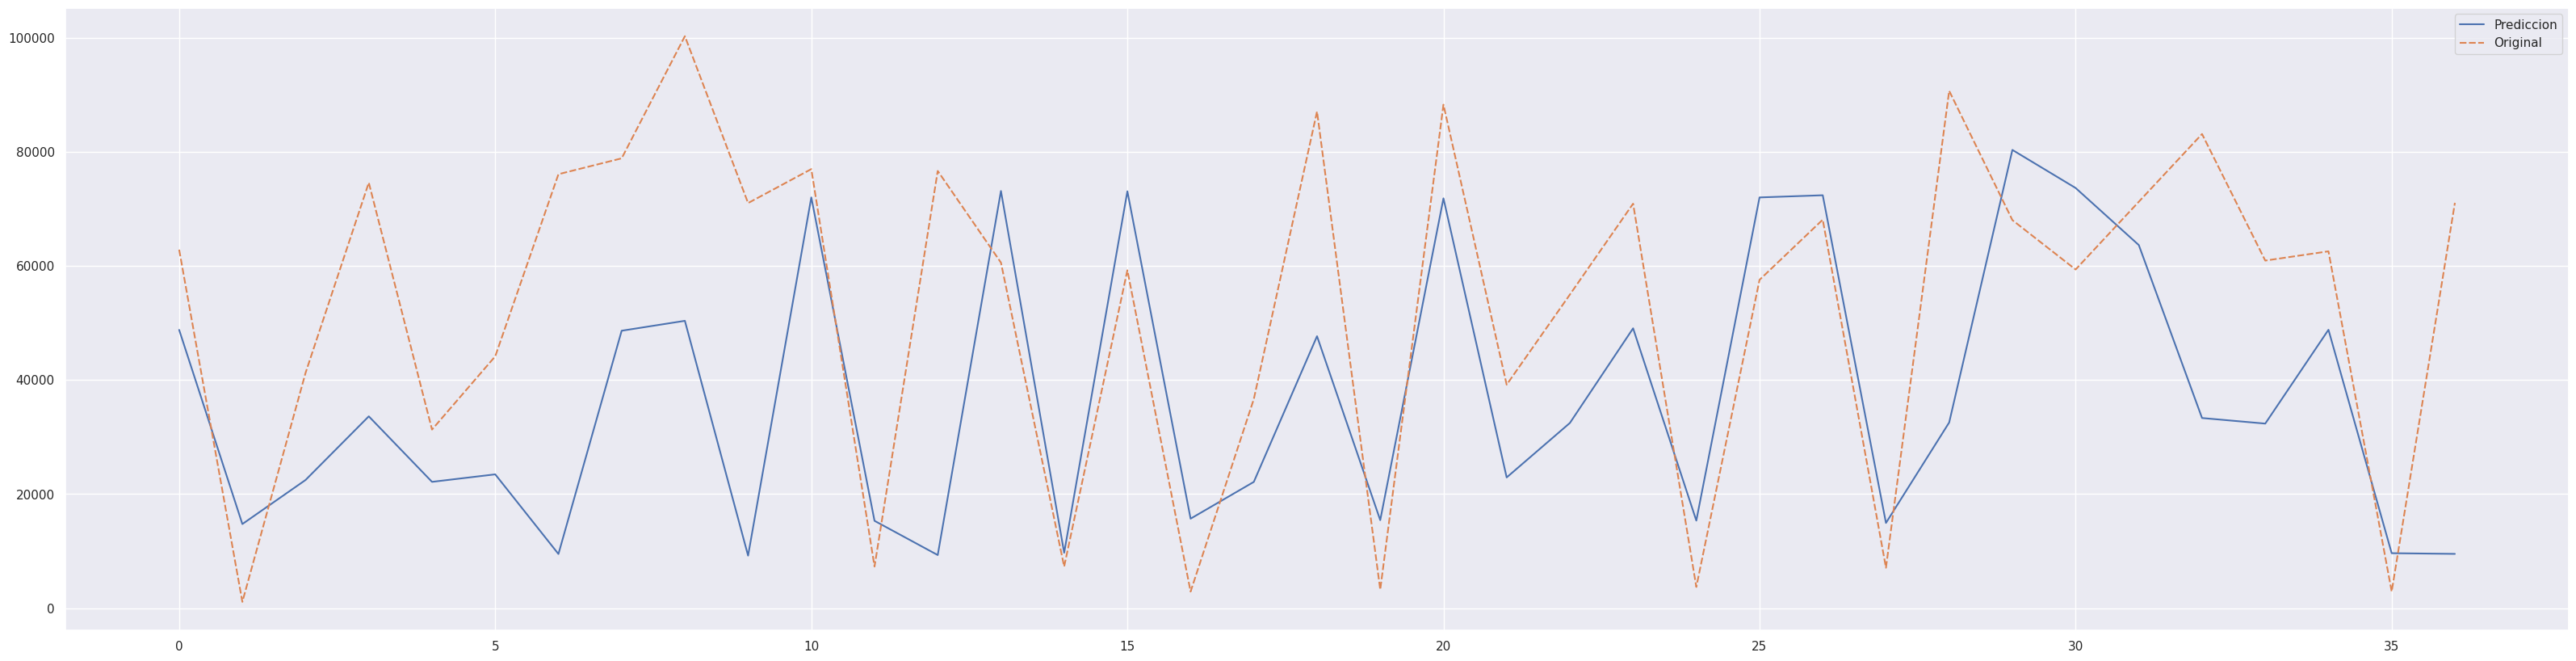

In [65]:
sbn.set(rc={'figure.figsize':(40, 10)})
sbn.set(font_scale = 1)
sbn.lineplot(data = resultado[['Prediccion','Original']])
plt.savefig('/home/bdebian/Documents/Projects/Stoke_prediccition/reports/Prediccion_desconocido.png')